# Register no:212008
# Date:
# Program title:
# Dataset:Kidney disease prediction


In [ ]:
pip install imblearn

In [3]:
kidney_df =pd.read_csv("D:\project\kidney_disease.csv")

In [2]:
import pandas as pd # data manipulation
import numpy as np #numerical computation,arrays
import matplotlib.pyplot as plt #plotting data & creating visualation
import seaborn as sms #plotting data & creating visualation
import os
import matplotlib.pyplot as plt
from numpy import NaN
from scipy.stats import skew
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import random
from imblearn.over_sampling import SMOTE
import sklearn
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Data Pre Processing

In [4]:
#Displaying first 15 values
kidney_df.head(15)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [ ]:
#blood pressure
#sugar
#Aluminium
#post cibum
#red blood cell
#Prothrombim Complex Concentrate
#packed cell volume
#Renal cell carcinoma
#high blood pressure


# Attribute Information


In [5]:
#Displaying the unique value from each column
col=kidney_df[['bp','sg','al','su',
               'rbc','pc','pcc','ba','bgr',
               'bu','sc','sod','pot','hemo',
               'pcv','wc','rc','htn','dm',
               'cad','appet','pe','ane','classification']]
for i in col:
    print(i,"\t",col[i].unique())
    

bp 	 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
sg 	 [1.02  1.01  1.005 1.015   nan 1.025]
al 	 [ 1.  4.  2.  3.  0. nan  5.]
su 	 [ 0.  3.  4.  1. nan  2.  5.]
rbc 	 [nan 'normal' 'abnormal']
pc 	 ['normal' 'abnormal' nan]
pcc 	 ['notpresent' 'present' nan]
ba 	 ['notpresent' 'present' nan]
bgr 	 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172.
 101. 298. 153.  88. 226. 143. 115.  89. 297. 233. 294. 323. 125.  90.
 308. 118. 224. 128. 122. 214. 213. 268. 256.  84. 105. 288. 139.  78.
 273. 242. 424. 303. 148. 160. 192. 307. 220. 447. 309.  22. 111. 261.
 215. 234. 131. 352.  80. 239. 110. 130. 184. 252. 113. 230. 341. 255.
 103. 238. 248. 120. 241. 269. 201. 203. 463. 17

# checking for null values


In [6]:
kidney_df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

<AxesSubplot:>

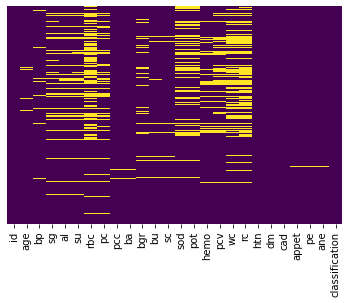

In [7]:
#This is a visualization of missing data in the dataset
sms.heatmap(kidney_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Data cleaning

In [5]:
#Dropping a column ID
kidney_df.drop(["id"],inplace=True,axis=1) 

In [8]:
#Replacing \t?,\t43,\t?,\t6200,\t8400,ck\t 
kidney_df['pcv']=kidney_df['pcv'].replace(to_replace = '\t?',value=np.nan)
kidney_df['pcv']=kidney_df['pcv'].replace(to_replace = '\t43',value=43)
kidney_df['pcv']=kidney_df['pcv'].replace(to_replace ='nan' ,value=np.nan)
kidney_df['wc']=kidney_df['wc'].replace(to_replace = '\t?',value=np.nan)
kidney_df['wc']=kidney_df['wc'].replace(to_replace = '\t6200',value=6200)
kidney_df['wc']=kidney_df['wc'].replace(to_replace = '\t8400',value=8400)
kidney_df['rc']=kidney_df['rc'].replace(to_replace = '\t?',value=np.nan)
kidney_df['dm']=kidney_df['dm'].replace(to_replace = '\tno',value='no')
kidney_df['dm']=kidney_df['dm'].replace(to_replace = '\tyes',value='yes')
kidney_df['cad']=kidney_df['cad'].replace(to_replace = '\tno',value='no')
kidney_df['classification']=kidney_df['classification'].replace(to_replace = 'ckd\t',value='ckd')

In [9]:
#Deleting null values of age 
delage =kidney_df[(kidney_df['age'].isnull())].index
kidney_df.drop(delage , inplace=True)
kidney_df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [10]:
#converting the values to numerical data
kidney_df['htn']=kidney_df['htn'].replace(to_replace = 'yes',value='1')
kidney_df['htn']=kidney_df['htn'].replace(to_replace = 'no',value='0')
kidney_df['dm']=kidney_df['dm'].replace(to_replace = 'yes',value='1')
kidney_df['dm']=kidney_df['dm'].replace(to_replace = 'no',value='0')
kidney_df['cad']=kidney_df['cad'].replace(to_replace = 'yes',value='1')
kidney_df['cad']=kidney_df['cad'].replace(to_replace = 'no',value='0')
kidney_df['pe']=kidney_df['pe'].replace(to_replace = 'yes',value='1')
kidney_df['pe']=kidney_df['pe'].replace(to_replace = 'no',value='0')
kidney_df['ane']=kidney_df['ane'].replace(to_replace = 'yes',value='1')
kidney_df['ane']=kidney_df['ane'].replace(to_replace = 'no',value='0')

In [12]:
kidney_df.head(15)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,1,1,0,good,0,0,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,0,0,0,good,0,0,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,0,1,0,poor,0,1,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,1,0,0,poor,1,1,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,0,0,0,good,0,0,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39,7800,4.4,1,1,0,good,1,0,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,36,NaN,NaN,0,0,0,good,0,0,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,44,6900,5,0,1,0,good,1,0,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,33,9600,4.0,1,1,0,good,0,1,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,1,1,0,poor,0,1,ckd


In [11]:
#Median imputation for numeric data
rol=kidney_df[['bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']]
for i in rol:
    kidney_df[i] = kidney_df[i].replace(np.nan).astype(float)
    kidney_df[i] = kidney_df[i].fillna((kidney_df[i].median()))
kidney_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,1,1,0,good,0,0,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,38.0,6000.0,5.2,0,0,0,good,0,0,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,5.2,0,1,0,poor,0,1,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,1,0,0,poor,1,1,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,0,0,0,good,0,0,ckd


In [12]:
#Mode imputation for categorical data
mol=kidney_df[['rbc','pc','pcc','ba','bgr','htn','dm','cad','appet','pe','ane','classification']]
for i in mol:
    kidney_df[i]=kidney_df[i].fillna(kidney_df[i].mode().loc[0])
kidney_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,1,1,0,good,0,0,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,38.0,6000.0,5.2,0,0,0,good,0,0,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,5.2,0,1,0,poor,0,1,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,1,0,0,poor,1,1,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,0,0,0,good,0,0,ckd


In [14]:
#After median,mode imputation checking for null values
kidney_df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [15]:
col=kidney_df[['bp','sg','al','su',
               'rbc','pc','pcc','ba','bgr',
               'bu','sc','sod','pot','hemo',
               'pcv','wc','rc','htn','dm',
               'cad','appet','pe','ane','classification']]
for i in col:
    print(i,"\t",col[i].unique())    

bp 	 [ 80.  50.  70.  90. 100.  60. 110. 140. 180. 120.]
sg 	 [1.02  1.01  1.005 1.015 1.025]
al 	 [1. 4. 2. 3. 0. 5.]
su 	 [0. 3. 4. 1. 2. 5.]
rbc 	 ['normal' 'abnormal']
pc 	 ['normal' 'abnormal']
pcc 	 ['notpresent' 'present']
ba 	 ['notpresent' 'present']
bgr 	 [121. 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98. 157.
  76.  99. 114. 263. 173.  95. 108. 156. 264. 123. 107. 159. 140. 171.
 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246.  93. 253. 141.
 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158. 165.
 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172. 101.
 298. 153.  88. 226. 143. 115.  89. 297. 233. 294. 323. 125.  90. 308.
 118. 224. 128. 122. 214. 213. 268. 256.  84. 105. 288. 139.  78. 273.
 242. 424. 303. 148. 160. 192. 307. 447. 309.  22. 111. 261. 215. 234.
 131. 352.  80. 239. 130. 184. 252. 113. 230. 341. 255. 103. 238. 248.
 120. 241. 269. 201. 203. 463. 176.  82. 119.  97.  96.  81. 110. 116.
 134.  85.  83.  87.  75

# checking for outliers and its imputation


<AxesSubplot:>

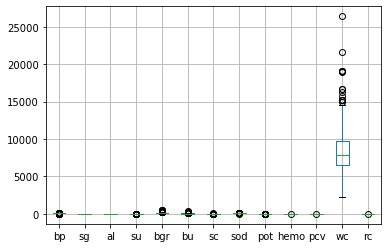

In [16]:
out=kidney_df[['bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']]
out.boxplot()

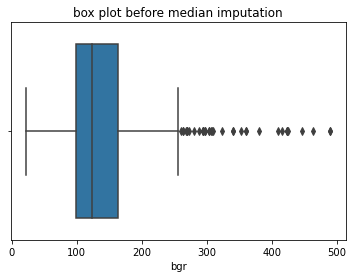

In [17]:
sms.boxplot(kidney_df['bgr'])
plt.title("box plot before median imputation")
plt.show()

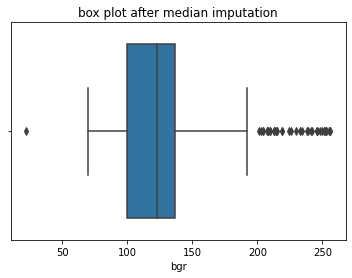

In [18]:
#Outliers
q1 =kidney_df['bgr'].quantile(0.25)
q3 =kidney_df['bgr'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['bgr'])
for i in kidney_df['bgr']:
    if i>upper_trial or i<lower_trial:
        kidney_df['bgr']=kidney_df['bgr'].replace(i,med)
sms.boxplot(kidney_df['bgr'])
plt.title("box plot after median imputation")
plt.show()

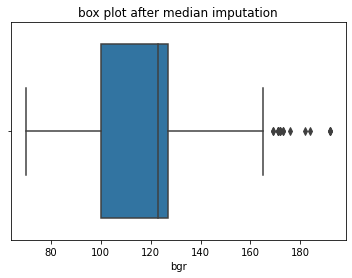

In [19]:
q1 =kidney_df['bgr'].quantile(0.25)
q3 =kidney_df['bgr'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['bgr'])
for i in kidney_df['bgr']:
    if i>upper_trial or i<lower_trial:
        kidney_df['bgr']=kidney_df['bgr'].replace(i,med)
sms.boxplot(kidney_df['bgr'])
plt.title("box plot after median imputation")
plt.show()

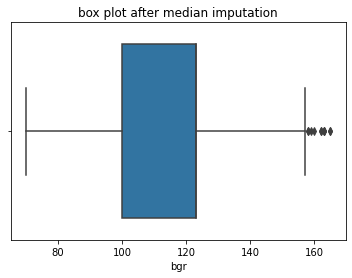

In [20]:
q1 =kidney_df['bgr'].quantile(0.25)
q3 =kidney_df['bgr'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['bgr'])
for i in kidney_df['bgr']:
    if i>upper_trial or i<lower_trial:
        kidney_df['bgr']=kidney_df['bgr'].replace(i,med)
sms.boxplot(kidney_df['bgr'])
plt.title("box plot after median imputation")
plt.show()

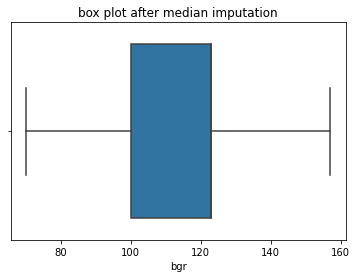

In [21]:
q1 =kidney_df['bgr'].quantile(0.25)
q3 =kidney_df['bgr'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['bgr'])
for i in kidney_df['bgr']:
    if i>upper_trial or i<lower_trial:
        kidney_df['bgr']=kidney_df['bgr'].replace(i,med)
sms.boxplot(kidney_df['bgr'])
plt.title("box plot after median imputation")
plt.show()

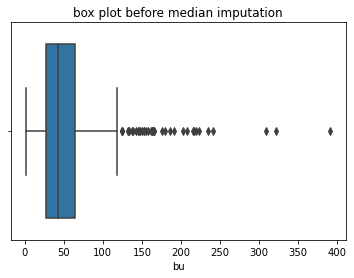

In [22]:
sms.boxplot(kidney_df['bu'])
plt.title("box plot before median imputation")
plt.show()

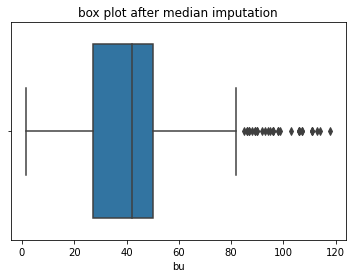

In [23]:
q1 =kidney_df['bu'].quantile(0.25)
q3 =kidney_df['bu'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['bu'])
for i in kidney_df['bu']:
    if i>upper_trial or i<lower_trial:
        kidney_df['bu']=kidney_df['bu'].replace(i,med)
sms.boxplot(kidney_df['bu'])
plt.title("box plot after median imputation")
plt.show()

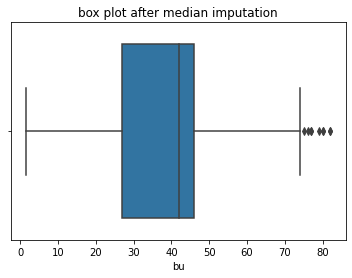

In [24]:
q1 =kidney_df['bu'].quantile(0.25)
q3 =kidney_df['bu'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['bu'])
for i in kidney_df['bu']:
    if i>upper_trial or i<lower_trial:
        kidney_df['bu']=kidney_df['bu'].replace(i,med)
sms.boxplot(kidney_df['bu'])
plt.title("box plot after median imputation")
plt.show()

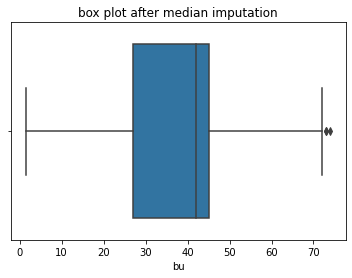

In [25]:
q1 =kidney_df['bu'].quantile(0.25)
q3 =kidney_df['bu'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['bu'])
for i in kidney_df['bu']:
    if i>upper_trial or i<lower_trial:
        kidney_df['bu']=kidney_df['bu'].replace(i,med)
sms.boxplot(kidney_df['bu'])
plt.title("box plot after median imputation")
plt.show()

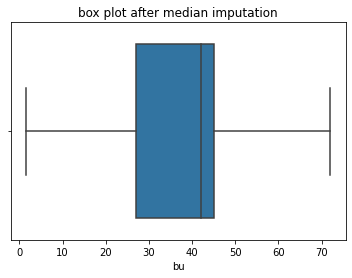

In [26]:
q1 =kidney_df['bu'].quantile(0.25)
q3 =kidney_df['bu'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['bu'])
for i in kidney_df['bu']:
    if i>upper_trial or i<lower_trial:
        kidney_df['bu']=kidney_df['bu'].replace(i,med)
sms.boxplot(kidney_df['bu'])
plt.title("box plot after median imputation")
plt.show()

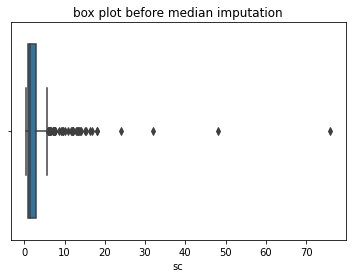

In [27]:
sms.boxplot(kidney_df['sc'])
plt.title("box plot before median imputation")
plt.show()

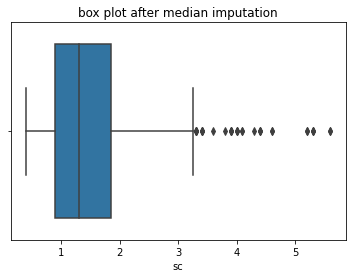

In [28]:
q1 =kidney_df['sc'].quantile(0.25)
q3 =kidney_df['sc'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['sc'])
for i in kidney_df['sc']:
    if i>upper_trial or i<lower_trial:
        kidney_df['sc']=kidney_df['sc'].replace(i,med)
sms.boxplot(kidney_df['sc'])
plt.title("box plot after median imputation")
plt.show()

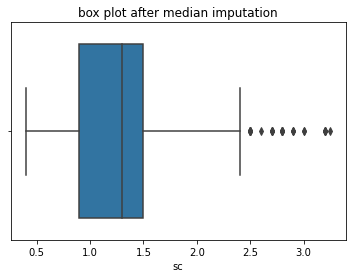

In [29]:
q1 =kidney_df['sc'].quantile(0.25)
q3 =kidney_df['sc'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['sc'])
for i in kidney_df['sc']:
    if i>upper_trial or i<lower_trial:
        kidney_df['sc']=kidney_df['sc'].replace(i,med)
sms.boxplot(kidney_df['sc'])
plt.title("box plot after median imputation")
plt.show()

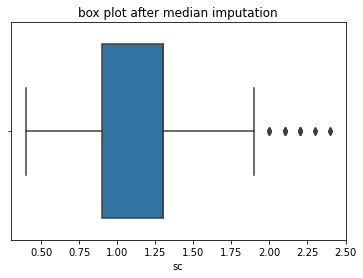

In [30]:
q1 =kidney_df['sc'].quantile(0.25)
q3 =kidney_df['sc'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['sc'])
for i in kidney_df['sc']:
    if i>upper_trial or i<lower_trial:
        kidney_df['sc']=kidney_df['sc'].replace(i,med)
sms.boxplot(kidney_df['sc'])
plt.title("box plot after median imputation")
plt.show()

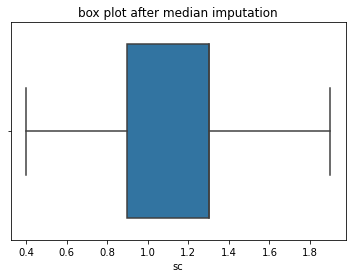

In [31]:
q1 =kidney_df['sc'].quantile(0.25)
q3 =kidney_df['sc'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['sc'])
for i in kidney_df['sc']:
    if i>upper_trial or i<lower_trial:
        kidney_df['sc']=kidney_df['sc'].replace(i,med)
sms.boxplot(kidney_df['sc'])
plt.title("box plot after median imputation")
plt.show()

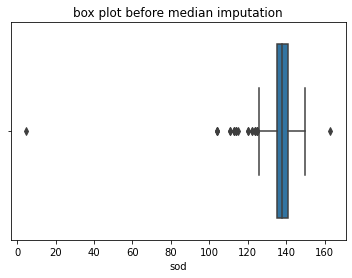

In [32]:
sms.boxplot(kidney_df['sod'])
plt.title("box plot before median imputation")
plt.show()

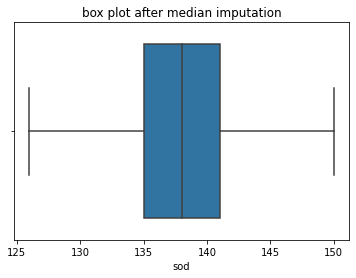

In [33]:
q1 =kidney_df['sod'].quantile(0.25)
q3 =kidney_df['sod'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['sod'])
for i in kidney_df['sod']:
    if i>upper_trial or i<lower_trial:
        kidney_df['sod']=kidney_df['sod'].replace(i,med)
sms.boxplot(kidney_df['sod'])
plt.title("box plot after median imputation")
plt.show()

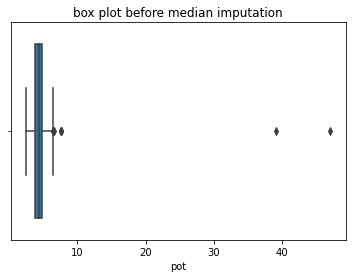

In [34]:
sms.boxplot(kidney_df['pot'])
plt.title("box plot before median imputation")
plt.show()

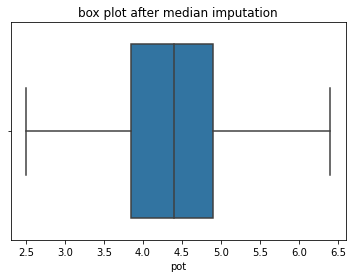

In [35]:
q1 =kidney_df['pot'].quantile(0.25)
q3 =kidney_df['pot'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['pot'])
for i in kidney_df['pot']:
    if i>upper_trial or i<lower_trial:
        kidney_df['pot']=kidney_df['pot'].replace(i,med)
sms.boxplot(kidney_df['pot'])
plt.title("box plot after median imputation")
plt.show()

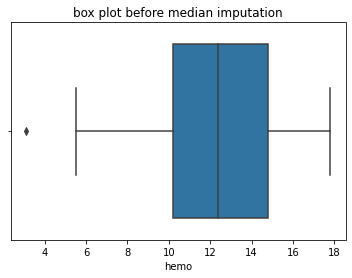

In [36]:
sms.boxplot(kidney_df['hemo'])
plt.title("box plot before median imputation")
plt.show()

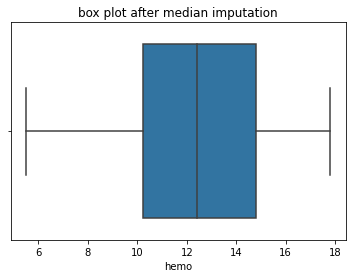

In [37]:
q1 =kidney_df['hemo'].quantile(0.25)
q3 =kidney_df['hemo'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['hemo'])
for i in kidney_df['hemo']:
    if i>upper_trial or i<lower_trial:
        kidney_df['hemo']=kidney_df['hemo'].replace(i,med)
sms.boxplot(kidney_df['hemo'])
plt.title("box plot after median imputation")
plt.show()

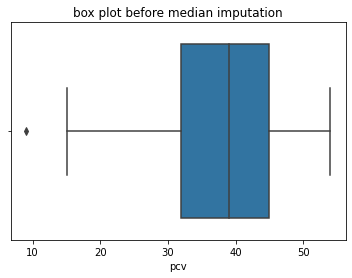

In [38]:
sms.boxplot(kidney_df['pcv'])
plt.title("box plot before median imputation")
plt.show()

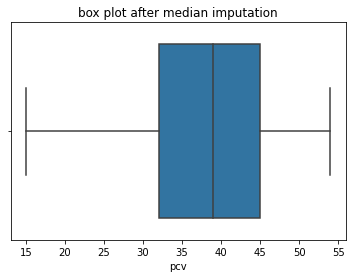

In [39]:
q1 =kidney_df['pcv'].quantile(0.25)
q3 =kidney_df['pcv'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['pcv'])
for i in kidney_df['pcv']:
    if i>upper_trial or i<lower_trial:
        kidney_df['pcv']=kidney_df['pcv'].replace(i,med)
sms.boxplot(kidney_df['pcv'])
plt.title("box plot after median imputation")
plt.show()

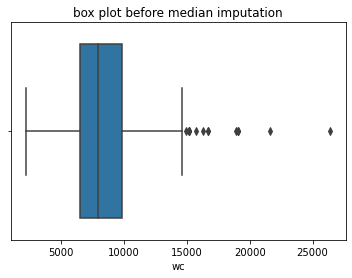

In [40]:
sms.boxplot(kidney_df['wc'])
plt.title("box plot before median imputation")
plt.show()

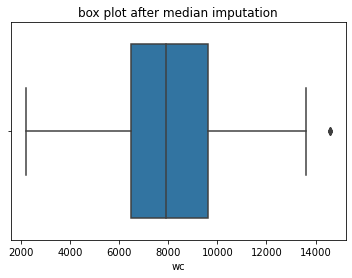

In [41]:
q1 =kidney_df['wc'].quantile(0.25)
q3 =kidney_df['wc'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['wc'])
for i in kidney_df['wc']:
    if i>upper_trial or i<lower_trial:
        kidney_df['wc']=kidney_df['wc'].replace(i,med)
sms.boxplot(kidney_df['wc'])
plt.title("box plot after median imputation")
plt.show()

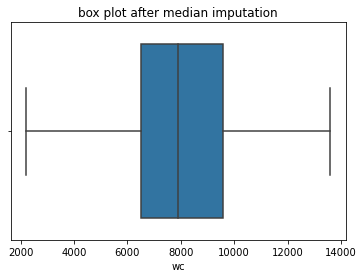

In [42]:
q1 =kidney_df['wc'].quantile(0.25)
q3 =kidney_df['wc'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['wc'])
for i in kidney_df['wc']:
    if i>upper_trial or i<lower_trial:
        kidney_df['wc']=kidney_df['wc'].replace(i,med)
sms.boxplot(kidney_df['wc'])
plt.title("box plot after median imputation")
plt.show()

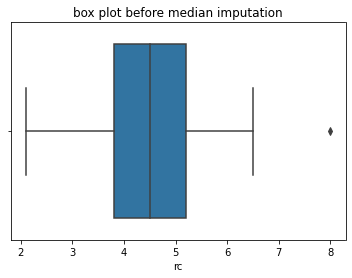

In [43]:
sms.boxplot(kidney_df['rc'])
plt.title("box plot before median imputation")
plt.show()

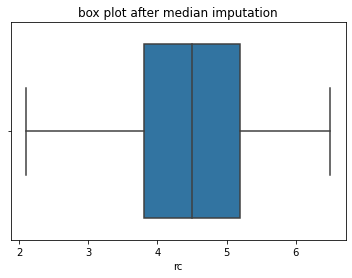

In [44]:
q1 =kidney_df['rc'].quantile(0.25)
q3 =kidney_df['rc'].quantile(0.75)
iqr=q3-q1
lower_trial=q1-1.5*iqr
upper_trial=q3+1.5*iqr
med=np.median(kidney_df['rc'])
for i in kidney_df['rc']:
    if i>upper_trial or i<lower_trial:
        kidney_df['rc']=kidney_df['rc'].replace(i,med)
sms.boxplot(kidney_df['rc'])
plt.title("box plot after median imputation")
plt.show()

In [46]:
#separating numeric data
d_num=kidney_df.select_dtypes(['int64','float64'])
d_num

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2
2,62.0,80.0,1.010,2.0,3.0,123.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,1.3,138.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,2.5,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


# skewness


In [47]:
#skewness
num=kidney_df[['bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']]
num.skew(axis = 0,skipna = True)

bp      1.534454
sg     -0.098725
al      0.939920
su      2.419527
bgr    -0.464705
bu      0.100112
sc     -0.279332
sod     0.200860
pot     0.129507
hemo   -0.218803
pcv    -0.256584
wc      0.092811
rc     -0.018398
dtype: float64

# observations:here we observe that skewness value of al is above 0.5

In [48]:
#separating numeric data
d_num=kidney_df.select_dtypes(['int64','float64'])
d_num

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2
2,62.0,80.0,1.010,2.0,3.0,123.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,1.3,138.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,2.5,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


age
-0.6656930770628687


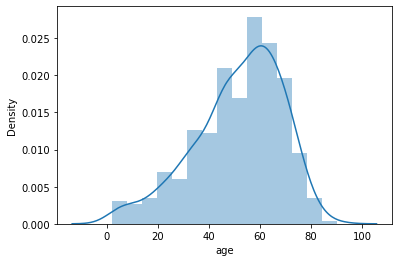

bp
1.5285614686487703


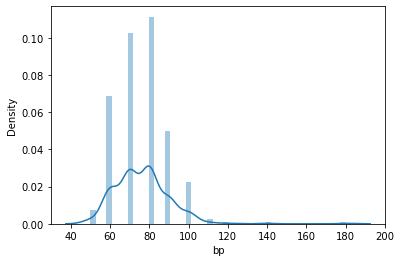

sg
-0.09834596106325733


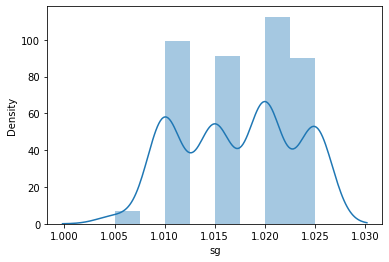

al
0.936310787759767


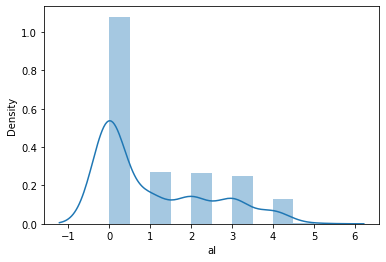

su
2.4102345506420866


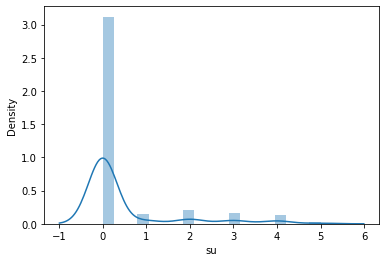

bgr
-0.4629205807418815


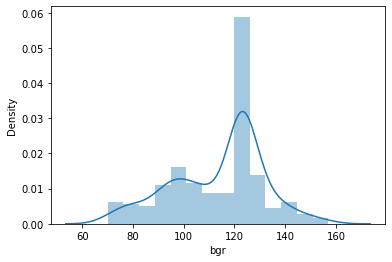

bu
0.09972749736659511


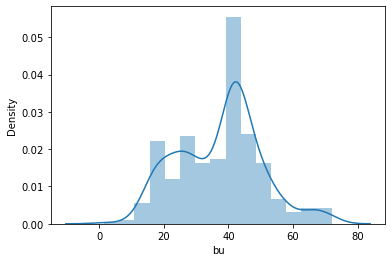

sc
-0.2782589013749661


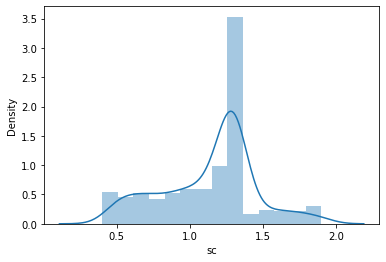

sod
0.20008812552116817


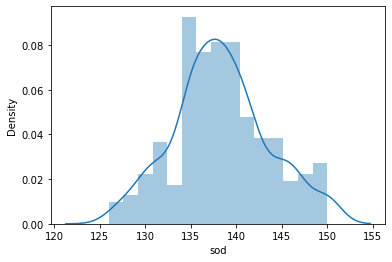

pot
0.12900981772729328


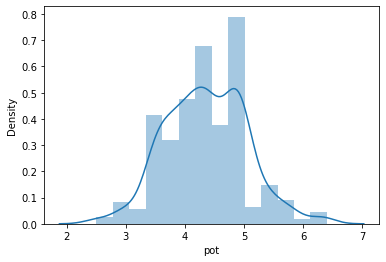

hemo
-0.21796301893900386


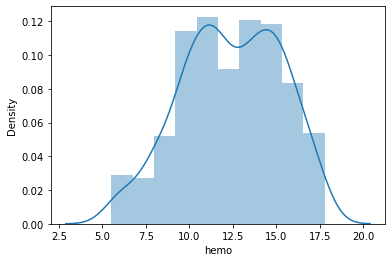

pcv
-0.2555983523353376


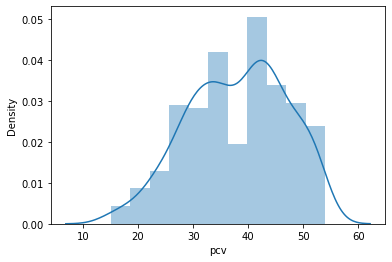

wc
0.09245449942771843


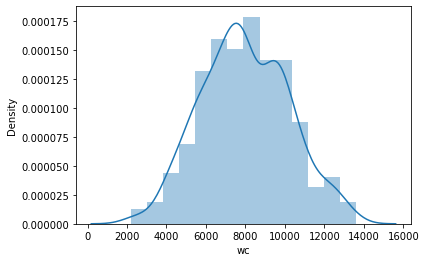

rc
-0.018327413509797233


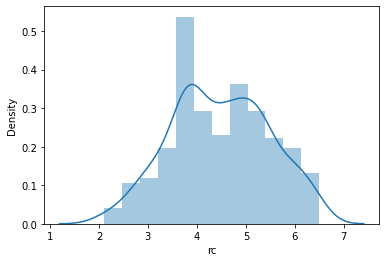

In [49]:
#Distplot graph all numerical data
from scipy.stats import skew
x =d_num
for i in x:
    print(i)
    print(skew(x[i]))
    plt.figure()
    sms.distplot(x[i])
    plt.show()

# correlation value

In [50]:
d1=kidney_df[['bp','sg','al','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']]
d1.corr()

,bp,sg,al,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
bp,1.000000,-0.184164,0.160616,0.095590,0.053643,0.205160,-0.114225,0.080299,-0.282024,-0.290522,0.036094,-0.193087
sg,-0.184164,1.000000,-0.441099,-0.160312,-0.234296,-0.450933,0.357557,0.060630,0.563374,0.550448,-0.139932,0.519971
al,0.160616,-0.441099,1.000000,0.150107,0.292128,0.453508,-0.365508,0.067031,-0.534917,-0.508629,0.060670,-0.522041
bgr,0.095590,-0.160312,0.150107,1.000000,0.040166,0.207878,-0.162369,0.067816,-0.178362,-0.164326,0.006726,-0.202439
bu,0.053643,-0.234296,0.292128,0.040166,1.000000,0.360803,-0.146587,0.137734,-0.304197,-0.291404,0.114319,-0.301062
sc,0.205160,-0.450933,0.453508,0.207878,0.360803,1.000000,-0.343425,0.028927,-0.512347,-0.514700,0.110802,-0.464633
sod,-0.114225,0.357557,-0.365508,-0.162369,-0.146587,-0.343425,1.000000,0.000429,0.411072,0.396207,0.069924,0.335603
pot,0.080299,0.060630,0.067031,0.067816,0.137734,0.028927,0.000429,1.000000,-0.072835,-0.103577,-0.040453,-0.071300
hemo,-0.282024,0.563374,-0.534917,-0.178362,-0.304197,-0.512347,0.411072,-0.072835,1.000000,0.869042,-0.012214,0.719069
pcv,-0.290522,0.550448,-0.508629,-0.164326,-0.291404,-0.514700,0.396207,-0.103577,0.869042,1.000000,-0.002783,0.743292


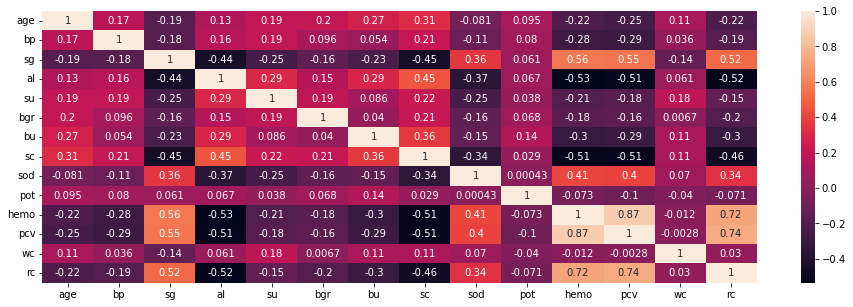

In [51]:
plt.figure(figsize = (16,5))
sms.heatmap(d_num.corr() , annot = True)
plt.show()

# standardization

In [55]:

x = d1
d1= (x-x.mean())/x.std()
d1

,bp,sg,al,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,0.275862,0.483714,-0.034382,0.393820,-0.105693,0.192821,-0.066282,0.061650,1.047081,0.671850,-0.080688,0.728417
1,-1.895854,0.483714,2.206204,0.393820,-1.486812,-1.053344,-0.066282,0.061650,-0.381251,0.000286,-0.895435,0.728417
2,0.275862,-1.267511,0.712480,0.504441,1.198697,2.062068,-0.066282,0.061650,-0.973486,-0.783204,-0.216479,0.728417
3,-0.448044,-2.143124,2.206204,0.172579,1.428883,0.504362,-0.066282,-2.714076,-0.416088,-0.671277,-0.578589,-0.574378
4,0.275862,-1.267511,0.712480,-0.435833,-0.872982,0.815903,-0.066282,-2.714076,-0.276739,-0.335495,-0.307006,0.127127
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.275862,0.483714,-0.781245,1.444715,0.891781,-1.987967,2.237395,0.792104,1.151593,1.007631,-0.578589,0.427772
396,-0.448044,1.359327,-0.781245,-2.150451,-0.489338,0.192821,0.509637,-1.253168,1.430292,1.791122,-0.080688,1.730568
397,0.275862,0.483714,-0.781245,-0.767695,-0.872982,-1.676426,-0.258255,0.061650,1.186431,1.231486,-0.623853,0.928847
398,-1.171949,1.359327,-0.781245,0.006649,0.968510,-0.430261,-0.642202,0.792104,0.629033,1.455340,-0.352270,1.429923


# Normalization

In [52]:

d1 = (d1 - d1.min())/ (d1.max() - d1.min())
d1

,bp,sg,al,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,0.230769,0.75,0.2,0.586207,0.489362,0.533333,0.500000,0.487179,0.804878,0.743590,0.491228,0.704545
1,0.000000,0.75,0.8,0.586207,0.234043,0.266667,0.500000,0.487179,0.471545,0.589744,0.333333,0.704545
2,0.230769,0.25,0.4,0.609195,0.730496,0.933333,0.500000,0.487179,0.333333,0.410256,0.464912,0.704545
3,0.153846,0.00,0.8,0.540230,0.773050,0.600000,0.500000,0.000000,0.463415,0.435897,0.394737,0.409091
4,0.230769,0.25,0.4,0.413793,0.347518,0.666667,0.500000,0.000000,0.495935,0.512821,0.447368,0.568182
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.230769,0.75,0.0,0.804598,0.673759,0.066667,1.000000,0.615385,0.829268,0.820513,0.394737,0.636364
396,0.153846,1.00,0.0,0.057471,0.418440,0.533333,0.625000,0.256410,0.894309,1.000000,0.491228,0.931818
397,0.230769,0.75,0.0,0.344828,0.347518,0.133333,0.458333,0.487179,0.837398,0.871795,0.385965,0.750000
398,0.076923,1.00,0.0,0.505747,0.687943,0.400000,0.375000,0.615385,0.707317,0.923077,0.438596,0.863636


# Multicollinearity treatment

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
X = d1
calc_vif(X)

,variables,VIF
0,bp,1.115193
1,sg,1.721009
2,al,1.629981
3,bgr,1.080383
4,bu,1.236423
5,sc,1.655560
6,sod,1.319656
7,pot,1.063269
8,hemo,4.599570
9,pcv,4.823978


# observation:features where vif value exceed above 5 then it is consider to be multicollinearity.

# class imbalance

In [58]:
kidney_df['classification'].value_counts()

ckd       242
notckd    149
Name: classification, dtype: int64

In [59]:
kidney_df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [60]:
kidney_df=pd.get_dummies(kidney_df)

In [61]:
kidney_df.dtypes

age                      float64
bp                       float64
sg                       float64
al                       float64
su                       float64
bgr                      float64
bu                       float64
sc                       float64
sod                      float64
pot                      float64
hemo                     float64
pcv                      float64
wc                       float64
rc                       float64
rbc_abnormal               uint8
rbc_normal                 uint8
pc_abnormal                uint8
pc_normal                  uint8
pcc_notpresent             uint8
pcc_present                uint8
ba_notpresent              uint8
ba_present                 uint8
htn_0                      uint8
htn_1                      uint8
dm_0                       uint8
dm_1                       uint8
cad_0                      uint8
cad_1                      uint8
appet_good                 uint8
appet_poor                 uint8
pe_0      

In [62]:
q=kidney_df.drop(['classification_ckd'],axis=1)
w=kidney_df['classification_notckd']
print(q.shape)
print(w.shape)

(391, 35)
(391,)


In [63]:
q=kidney_df.drop(['classification_ckd'],axis=1)
w=kidney_df['classification_notckd']
q_resampled , w_resampled = SMOTE().fit_resample(q,w)

In [64]:
w_resampled.value_counts()

0    242
1    242
Name: classification_notckd, dtype: int64

# observation:The target variable classes are balanced

# Data Visualization

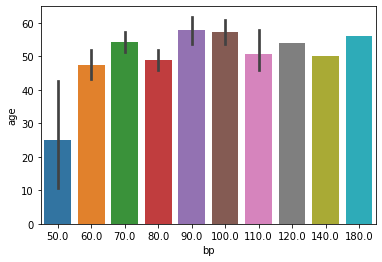

In [63]:
#Barplot indicates which age group is having more Blood Pressure
sms.barplot(x = 'bp' , y  = 'age' , data = kidney_df)
plt.show()
#Here we can see age group between 50-60 is having more Blood Pressure

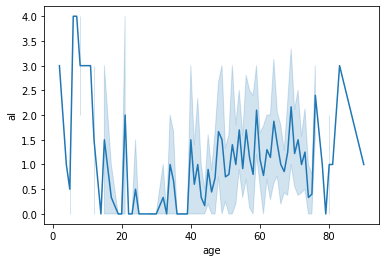

In [65]:
#This graph shows many age group are having more albuminuria 
sms.lineplot(x = 'age' , y = 'al' , data =kidney_df)
plt.show()

<AxesSubplot:xlabel='bp', ylabel='age'>

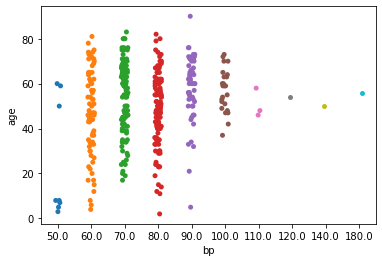

In [69]:
sms.stripplot(kidney_df['bp'],kidney_df['age'])

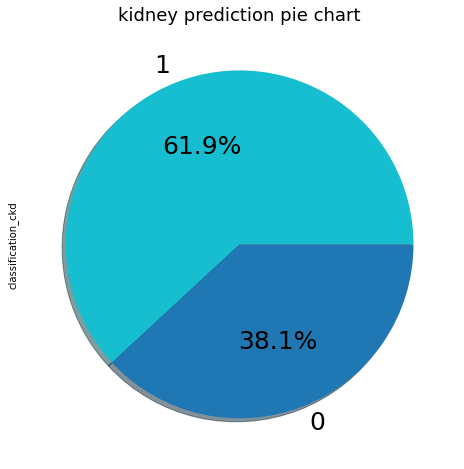

In [77]:
#pie graph
fig,axes =plt.subplots(figsize=(8,8))
kidney_df['classification_ckd'].value_counts().plot.pie(autopct='%1.1f%%',
 colormap='tab10_r',
fontsize=25,
shadow=True,
explode=None)
axes.set_title("kidney prediction pie chart",fontsize=18)
axes.set_xlabel(None)
plt.show()

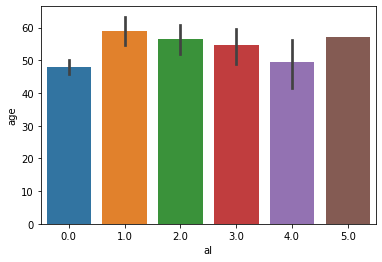

In [80]:
sms.barplot(x = 'al' , y  = 'age' , data = kidney_df)
plt.show()

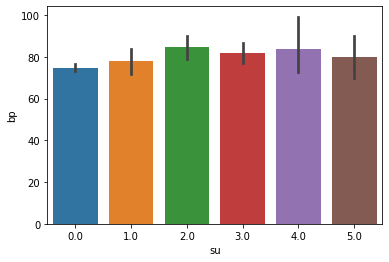

In [81]:
sms.barplot(x = 'su' , y  = 'bp' , data = kidney_df)
plt.show()

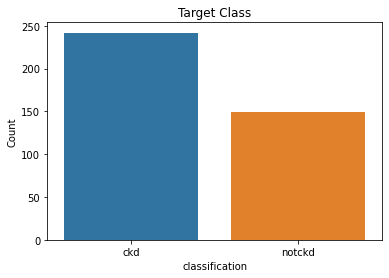

Percentage of chronic kidney disease sample:  61.89 %
Percentage of not a chronic kidney disease sample:  38.11 %


In [57]:
#before classimbalance
sms.countplot(x='classification', data = kidney_df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("Target Class")
plt.show()
print("Percentage of chronic kidney disease sample: ", round(len(kidney_df[kidney_df['classification']=='ckd'])/len(kidney_df['classification'])*100,2),"%")
print("Percentage of not a chronic kidney disease sample: ", round(len(kidney_df[kidney_df['classification']=='notckd'])/len(kidney_df['classification'])*100,2),"%")